# Detectability Power Test Notebook
@author: Max Felius

## Roadmap - Test type II error retrieval
- Assume sigma
- Plot Deformation (x-axis) vs detectability power (y-axis)

In [1]:
#imports 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
#variables
n = 1000
max_sub = 0.025 #[m]
sigma = 0.003 #[m]
z = np.linspace(0.00000001,max_sub,n) #[m]

# Determine point of intersection
https://stackoverflow.com/questions/22579434/python-finding-the-intersection-point-of-two-gaussian-curves
The two gaussian equations are defined and solved for x (where they intersect). In the end you will get a quadratic equation with coefficients relating to the gaussian means and variances. To solve this equation, a function, solve, is created and the function np.roots will find the intersection of this quadratic equation with the x-axis.

In [3]:
def solve(m1,m2,std1,std2):
    a = 1/(2*std1**2) - 1/(2*std2**2)
    b = m2/(std2**2) - m1/(std1**2)
    c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
    return np.roots([a,b,c])

# Determine area of intersection

https://stackoverflow.com/questions/32551610/overlapping-probability-of-two-normal-distribution-with-scipy

There are two Gaussian Bell curves. The first one is for the null hypothesis, which is that there is no deformation happening. The alternative hypothesis is that indeed deformation is happening. Thus the area both curves are overlapping is 1 - Detectability Power. The detectability power is thus 1 - overlapping area.

Area under curves  0.2112995473337107


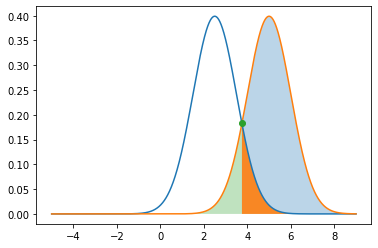

In [9]:
m1 = 2.5
std1 = 1.0
m2 = 5.0
std2 = 1.0

#Get point of intersect
result = solve(m1,m2,std1,std2)

#Get point on surface
x = np.linspace(-5,9,10000)
plot1=plt.plot(x,norm.pdf(x,m1,std1))
plot2=plt.plot(x,norm.pdf(x,m2,std2))
plot3=plt.plot(result,norm.pdf(result,m1,std1),'o')

#Plots integrated area
r = result[0]
olap = plt.fill_between(x[x>r], 0, norm.pdf(x[x>r],m2,std2),alpha=0.3)
olap = plt.fill_between(x[x>r], 0, norm.pdf(x[x>r],m1,std1),alpha=0.9)
olap = plt.fill_between(x[x<r], 0, norm.pdf(x[x<r],m2,std2),alpha=0.3)


# integrate
area = norm.cdf(r,m2,std2) + (1.-norm.cdf(r,m1,std1))
print("Area under curves ", area)

plt.show()

In [4]:
m1 = 0
std1 = sigma
std2 = sigma
dec_pow = []

for m2 in z:
    result = solve(m1,m2,std1,std2)
    r = result[0]
    area = 1-(norm.cdf(r,m2,std2) + (1-norm.cdf(r,m1,std1)))
    dec_pow.append(area)

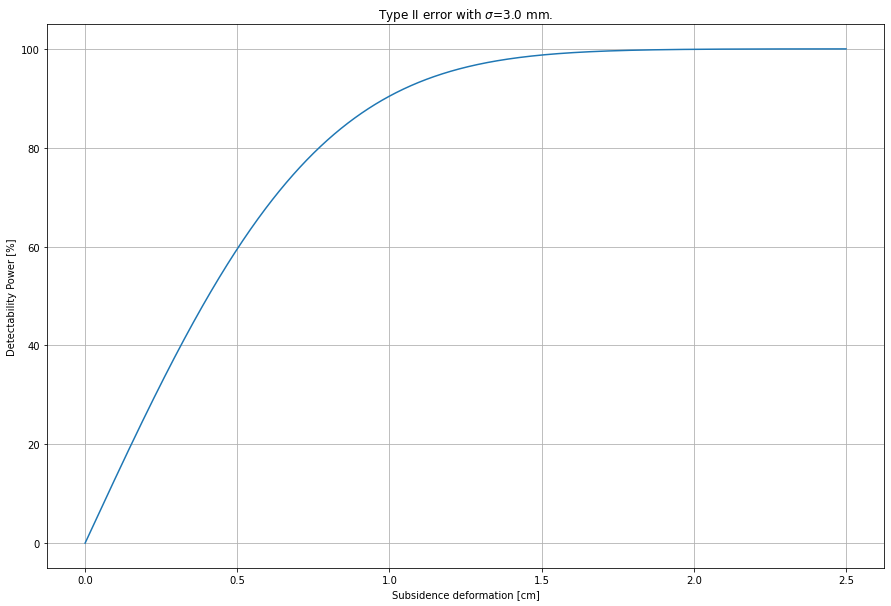

In [6]:
plt.figure(figsize=(15,10))
plt.plot(z*100,np.array(dec_pow)*100)

plt.title(f'Type II error with $\sigma$={sigma*1000} mm.')
plt.xlabel('Subsidence deformation [cm]')
plt.ylabel('Detectability Power [%]')
plt.grid(True);